# Example 2: Simple model

This notebook is a series of independent cells showing how to create a simple model from the beginning to the end using GeMpy

### Importing dependencies

In [2]:
# Importing
import theano.tensor as T
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy
# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

%matplotlib inline
#%matplotlib notebook

## Visualize data

In [3]:
geo_data = GeMpy.import_data([0,10,0,10,0,10], [50,50,50])


In [4]:
# =========================
# DATA GENERATION IN PYTHON
# =========================
# Layers coordinates
layer_1 = np.array([[0.5,4,7], [2,4,6.5], [4,4,7], [5,4,6]])#-np.array([5,5,4]))/8+0.5
layer_2 = np.array([[3,4,5], [6,4,4],[8,4,4], [7,4,3], [1,4,6]])
layers = np.asarray([layer_1,layer_2])

# Foliations coordinates
dip_pos_1 = np.array([7,4,7])#- np.array([5,5,4]))/8+0.5
dip_pos_2 = np.array([2.,4,4])

# Dips
dip_angle_1 = float(15)
dip_angle_2 = float(340)
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float64")

# Azimuths
azimuths = np.asarray([90,90], dtype="float64")

# Polarity
polarity = np.asarray([1,1], dtype="float64")

In [5]:
# Setting foliations and interfaces values
GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :np.append(layer_1[:, 0],layer_2[:,0]),
            "Y" :np.append(layer_1[:, 1],layer_2[:,1]),
            "Z" :np.append(layer_1[:, 2],layer_2[:,2]),
            "formation" : np.append(
               np.tile("Layer 1", len(layer_1)), 
               np.tile("Layer 2", len(layer_2))),
            "labels" : [r'${\bf{x}}_{\alpha \, 0}^1$',
               r'${\bf{x}}_{\alpha \, 1}^1$',
               r'${\bf{x}}_{\alpha \, 2}^1$',
               r'${\bf{x}}_{\alpha \, 3}^1$',
               r'${\bf{x}}_{\alpha \, 0}^2$',
               r'${\bf{x}}_{\alpha \, 1}^2$',
               r'${\bf{x}}_{\alpha \, 2}^2$',
               r'${\bf{x}}_{\alpha \, 3}^2$',
               r'${\bf{x}}_{\alpha \, 4}^2$'] }))

GeMpy.set_foliations(geo_data,  pn.DataFrame(
    data = {"X" :np.append(dip_pos_1[0],dip_pos_2[0]),
            "Y" :np.append(dip_pos_1[ 1],dip_pos_2[1]),
            "Z" :np.append(dip_pos_1[ 2],dip_pos_2[2]),
            "azimuth" : azimuths,
            "dip" : dips_angles,
            "polarity" : polarity,
            "formation" : ["Layer 1", "Layer 2"],
            "labels" : [r'${\bf{x}}_{\beta \,{0}}$',
              r'${\bf{x}}_{\beta \,{1}}$'] })) 

GeMpy.get_raw_data(geo_data)

G_x           G_y       G_z    X    Y    Z  azimuth    dip  \
interfaces 0       NaN           NaN       NaN  0.5  4.0  7.0      NaN    NaN   
           1       NaN           NaN       NaN  2.0  4.0  6.5      NaN    NaN   
           2       NaN           NaN       NaN  4.0  4.0  7.0      NaN    NaN   
           3       NaN           NaN       NaN  5.0  4.0  6.0      NaN    NaN   
           4       NaN           NaN       NaN  3.0  4.0  5.0      NaN    NaN   
           5       NaN           NaN       NaN  6.0  4.0  4.0      NaN    NaN   
           6       NaN           NaN       NaN  8.0  4.0  4.0      NaN    NaN   
           7       NaN           NaN       NaN  7.0  4.0  3.0      NaN    NaN   
           8       NaN           NaN       NaN  1.0  4.0  6.0      NaN    NaN   
foliations 0  0.258819  1.584810e-17  0.965926  7.0  4.0  7.0     90.0   15.0   
           1 -0.342020 -2.094269e-17  0.939693  2.0  4.0  4.0     90.0  340.0   

             formation                      labels  order_series  polarity  \
interfaces 0   Layer 1  ${\bf{x}}_{\alpha \, 0}^1$             1       NaN   
           1   Layer 1  ${\bf{x}}_{\alpha \, 1}^1$             1       NaN   
           2   Layer 1  ${\bf{x}}_{\alpha \, 2}^1$             1       NaN   
           3   Layer 1  ${\bf{x}}_{\alpha \, 3}^1$             1       NaN   
           4   Layer 2  ${\bf{x}}_{\alpha \, 0}^2$             1       NaN   
           5   Layer 2  ${\bf{x}}_{\alpha \, 1}^2$             1       NaN   
           6   Layer 2  ${\bf{x}}_{\alpha \, 2}^2$             1       NaN   
           7   Layer 2  ${\bf{x}}_{\alpha \, 3}^2$             1       NaN   
           8   Layer 2  ${\bf{x}}_{\alpha \, 4}^2$             1       NaN   
foliations 0   Layer 1    ${\bf{x}}_{\beta \,{0}}$             1       1.0   
           1   Layer 2    ${\bf{x}}_{\beta \,{1}}$             1       1.0   

                     series  
interfaces 0  Default serie  
           1  Default serie  
           2  Default serie  
           3  Default serie  
           4  Default serie  
           5  Default serie  
           6  Default serie  
           7  Default serie  
           8  Default serie  
foliations 0  Default serie  
           1  Default serie

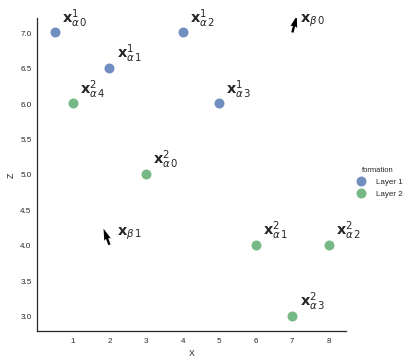

In [6]:
# Plotting data
GeMpy.plot_data(geo_data)
GeMpy.PlotData.annotate_plot(GeMpy.get_raw_data(geo_data),
                             'labels','X', 'Z', size = 'x-large')

### Interactive pandas Dataframe

Using qgrid it is possible to modify the tables in place as following:

In [8]:
GeMpy.i_set_data(geo_data)

## Grid and potential field

We can see the potential field generated out of the data above

In [10]:
from ipywidgets import widgets
from ipywidgets import interact
def cov_cubic_f(r,a = 6, c_o = 1):
    if r <= a:
        return c_o*(1-7*(r/a)**2+35/4*(r/a)**3-7/2*(r/a)**5+3/4*(r/a)**7)
    else:
        return 0
    
def cov_cubic_d1_f(r,a = 6., c_o = 1):
    SED_dips_dips = r
    f = c_o
    return  (f * ((-14 /a ** 2) + 105 / 4 * SED_dips_dips / a ** 3 -
            35 / 2 * SED_dips_dips ** 3 / a ** 5 + 21 / 4 * SED_dips_dips ** 5 / a ** 7))

def cov_cubic_d2_f(r, a = 6, c_o = 1):
    SED_dips_dips = r
    f = c_o
    return 7*f*(9*r**5-20*a**2*r**3+15*a**4*r-4*a**5)/(2*a**7)

def plot_potential_var(a = 10, c_o = 1, nugget_effect = 0):
    x = np.linspace(0,12,50)
    y = [cov_cubic_f(i, a = a, c_o = c_o) for i in x]
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.plot(x,c_o-np.asarray(y)+nugget_effect)
    plt.hlines(0,0,12, linestyles = "--")
    plt.title("Variogram")
    plt.margins(0,0.1)
    
    ax2 = fig.add_subplot(122)
    ax2.plot(x,np.asarray(y))
    ax2.scatter(0,nugget_effect+c_o)
    plt.title("Covariance Function")
    plt.tight_layout()
    plt.margins(0,0.1)
    plt.suptitle('$C_Z(r)$', y = 1.08, fontsize=15, fontweight='bold')

def plot_potential_direction_var( a = 10, c_o = 1, nugget_effect = 0):
    x = np.linspace(0,12,50)
    y = np.asarray([cov_cubic_d1_f(i, a = a, c_o = c_o) for i in x])
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.plot(x,c_o-np.asarray(y)+nugget_effect)
    plt.title("Variogram")
    plt.margins(0,0.1)
    
    ax2 = fig.add_subplot(122)
    ax2.plot(x,np.asarray(y))
    #ax2.scatter(0,c_o)
    plt.title("Cross-Covariance Function")
    plt.tight_layout()
    plt.margins(0,0.1)
    plt.suptitle('$C\'_Z / r$', y = 1.08, fontsize=15, fontweight='bold')    

def plot_directionU_directionU_var(a = 10, c_o = 1, nugget_effect = 0):
    
    x = np.linspace(0.01,12,50)
    d1 = np.asarray([cov_cubic_d1_f(i, a = a, c_o = c_o) for i in x])
    d2 = np.asarray([cov_cubic_d2_f(i, a = a, c_o = c_o) for i in x])
    
    y = -(d2) # (0.5*x**2)/(x**2)*
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.plot(x,c_o-np.asarray(y)+nugget_effect)

    plt.title("Variogram")
    plt.margins(0,0.1)
    
    ax2 = fig.add_subplot(122)
    ax2.plot(x,np.asarray(y))
    ax2.scatter(0,nugget_effect+y[0], s = 20)

    plt.title("Covariance Function")
    plt.tight_layout()
    plt.margins(0,0.1)
    plt.suptitle('$C_{\partial {Z}/ \partial x, \, \partial {Z}/ \partial x}(h_x)$'
                 , y = 1.08, fontsize=15)
    
def plot_directionU_directionV_var(a = 10, c_o = 1, nugget_effect = 0):
    x = np.linspace(0.01,12,50)
    d1 = np.asarray([cov_cubic_d1_f(i, a = a, c_o = c_o) for i in x])
    d2 = np.asarray([cov_cubic_d2_f(i, a = a, c_o = c_o) for i in x])
    y = -(d2-d1) # (0.5*x**2)/(x**2)*
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.plot(x,c_o-np.asarray(y)+nugget_effect)

    plt.title("Variogram")
    plt.margins(0,0.1)
    
    ax2 = fig.add_subplot(122)
    ax2.plot(x,np.asarray(y))
    ax2.scatter(0,nugget_effect+y[0], s = 20)
    plt.title("Covariance Function")
    plt.tight_layout()
    plt.margins(0,0.1)
    plt.suptitle('$C_{\partial {Z}/ \partial x, \, \partial {Z}/ \partial y}(h_x,h_y)$'
                 , y = 1.08, fontsize=15)
    

def plot_all(a = 10, c_o = 1, nugget_effect = 0):
    
    
    plot_potential_direction_var(a, c_o, nugget_effect)
    plot_directionU_directionU_var(a, c_o, nugget_effect)
    plot_directionU_directionV_var(a, c_o, nugget_effect)

## From potential field to block

The potential field describe the deposition form and direction of a basin. However, in most scenarios the real goal of structural modeling is the segmentation in layers of areas with significant change of properties (e.g. shales and carbonates). Since we need to provide at least one point per interface, we can easily compute the value of the potential field at the intersections between two layers. Therefore, by simple comparison between a concrete value of the potential field and the values of the interfaces it is possible to segment the domain into layers Fig X. 

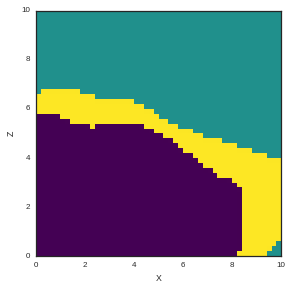

In [11]:
GeMpy.compute_block_model(geo_data)
GeMpy.plot_section(geo_data, 13)

### Combining potential fields: Depositional series

In reality, most geological settings are formed by a concatenation of depositional phases separated clearly by unconformity bounderies. Each of these phases can be model by a potential field. In order to capture this behavior, we can classify the formations that belong to individual depositional phase into categories or series. The potential field computed for each of these series could be seen as a sort of evolution of the basin if an unconformity did not occur. Finally, sorting the temporal relation between series allow to superpose the corresponding potential field at an specific location.

In the next example, we add a new serie consisting in a layer---'Layer 3'--- Fig X, which generate the potential field of Fig X and subsequently the block Figure X.

In [12]:
layer_3 = np.array([[2,4,3], [8,4,2], [9,4,3]])
dip_pos_3 = np.array([1,4,1])
dip_angle_3 = float(80)
azimuth_3 = 90
polarity_3 = 1



GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :layer_3[:, 0],
            "Y" :layer_3[:, 1],
            "Z" :layer_3[:, 2],
            "formation" : np.tile("Layer 3", len(layer_3)), 
            "labels" : [  r'${\bf{x}}_{\alpha \, 0}^3$',
                           r'${\bf{x}}_{\alpha \, 1}^3$',
                           r'${\bf{x}}_{\alpha \, 2}^3$'] }), append = True)
GeMpy.get_raw_data(geo_data,"interfaces")

I am here


,X,Y,Z,formation,labels,series
0,0.5,4.0,7.0,Layer 1,"${\bf{x}}_{\alpha \, 0}^1$",Default serie
1,2.0,4.0,6.5,Layer 1,"${\bf{x}}_{\alpha \, 1}^1$",Default serie
2,4.0,4.0,7.0,Layer 1,"${\bf{x}}_{\alpha \, 2}^1$",Default serie
3,5.0,4.0,6.0,Layer 1,"${\bf{x}}_{\alpha \, 3}^1$",Default serie
4,3.0,4.0,5.0,Layer 2,"${\bf{x}}_{\alpha \, 0}^2$",Default serie
5,6.0,4.0,4.0,Layer 2,"${\bf{x}}_{\alpha \, 1}^2$",Default serie
6,8.0,4.0,4.0,Layer 2,"${\bf{x}}_{\alpha \, 2}^2$",Default serie
7,7.0,4.0,3.0,Layer 2,"${\bf{x}}_{\alpha \, 3}^2$",Default serie
8,1.0,4.0,6.0,Layer 2,"${\bf{x}}_{\alpha \, 4}^2$",Default serie
0,2.0,4.0,3.0,Layer 3,"${\bf{x}}_{\alpha \, 0}^3$",Default serie


In [13]:
 
GeMpy.set_foliations(geo_data, pn.DataFrame(data = {
                     "X" : dip_pos_3[0],
                     "Y" : dip_pos_3[1],
                     "Z" : dip_pos_3[2],
                     "azimuth" : azimuth_3,
                     "dip" : dip_angle_3,
                     "polarity" : polarity_3,
                     "formation" : [ 'Layer 3'],
                     "labels" : r'${\bf{x}}_{\beta \,{2}}$'}), append = True)
GeMpy.get_raw_data(geo_data, 'foliations')

,G_x,G_y,G_z,X,Y,Z,azimuth,dip,formation,labels,polarity,series
0,0.258819,1.584810e-17,0.965926,7.0,4.0,7.0,90.0,15.0,Layer 1,"${\bf{x}}_{\beta \,{0}}$",1.0,Default serie
1,-0.342020,-2.094269e-17,0.939693,2.0,4.0,4.0,90.0,340.0,Layer 2,"${\bf{x}}_{\beta \,{1}}$",1.0,Default serie
0,0.984808,6.030208e-17,0.173648,1.0,4.0,1.0,90.0,80.0,Layer 3,"${\bf{x}}_{\beta \,{2}}$",1.0,Default serie


In [14]:
GeMpy.set_data_series(geo_data, {'younger': ('Layer 1', 'Layer 2'),
                      'older': 'Layer 3'}, order_series = ['younger', 'older'])

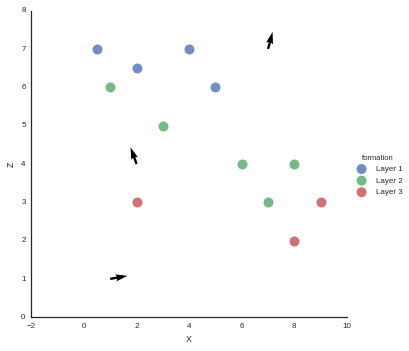

In [15]:
GeMpy.plot_data(geo_data)

This potential field gives the following block

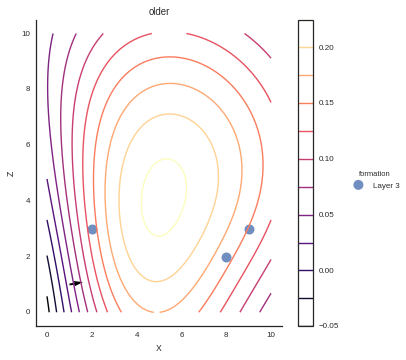

In [16]:
GeMpy.plot_potential_field(geo_data,4, n_pf=1, direction='y', 
                           colorbar = True, cmap = 'magma' )


In [17]:
GeMpy.get_raw_data(geo_data)

G_x           G_y       G_z    X    Y    Z  azimuth    dip  \
interfaces 0       NaN           NaN       NaN  0.5  4.0  7.0      NaN    NaN   
           1       NaN           NaN       NaN  2.0  4.0  6.5      NaN    NaN   
           2       NaN           NaN       NaN  4.0  4.0  7.0      NaN    NaN   
           3       NaN           NaN       NaN  5.0  4.0  6.0      NaN    NaN   
           4       NaN           NaN       NaN  3.0  4.0  5.0      NaN    NaN   
           5       NaN           NaN       NaN  6.0  4.0  4.0      NaN    NaN   
           6       NaN           NaN       NaN  8.0  4.0  4.0      NaN    NaN   
           7       NaN           NaN       NaN  7.0  4.0  3.0      NaN    NaN   
           8       NaN           NaN       NaN  1.0  4.0  6.0      NaN    NaN   
           0       NaN           NaN       NaN  2.0  4.0  3.0      NaN    NaN   
           1       NaN           NaN       NaN  8.0  4.0  2.0      NaN    NaN   
           2       NaN           NaN       NaN  9.0  4.0  3.0      NaN    NaN   
foliations 0  0.258819  1.584810e-17  0.965926  7.0  4.0  7.0     90.0   15.0   
           1 -0.342020 -2.094269e-17  0.939693  2.0  4.0  4.0     90.0  340.0   
           0  0.984808  6.030208e-17  0.173648  1.0  4.0  1.0     90.0   80.0   

             formation                      labels  polarity   series  
interfaces 0   Layer 1  ${\bf{x}}_{\alpha \, 0}^1$       NaN  younger  
           1   Layer 1  ${\bf{x}}_{\alpha \, 1}^1$       NaN  younger  
           2   Layer 1  ${\bf{x}}_{\alpha \, 2}^1$       NaN  younger  
           3   Layer 1  ${\bf{x}}_{\alpha \, 3}^1$       NaN  younger  
           4   Layer 2  ${\bf{x}}_{\alpha \, 0}^2$       NaN  younger  
           5   Layer 2  ${\bf{x}}_{\alpha \, 1}^2$       NaN  younger  
           6   Layer 2  ${\bf{x}}_{\alpha \, 2}^2$       NaN  younger  
           7   Layer 2  ${\bf{x}}_{\alpha \, 3}^2$       NaN  younger  
           8   Layer 2  ${\bf{x}}_{\alpha \, 4}^2$       NaN  younger  
           0   Layer 3  ${\bf{x}}_{\alpha \, 0}^3$       NaN    older  
           1   Layer 3  ${\bf{x}}_{\alpha \, 1}^3$       NaN    older  
           2   Layer 3  ${\bf{x}}_{\alpha \, 2}^3$       NaN    older  
foliations 0   Layer 1    ${\bf{x}}_{\beta \,{0}}$       1.0  younger  
           1   Layer 2    ${\bf{x}}_{\beta \,{1}}$       1.0  younger  
           0   Layer 3    ${\bf{x}}_{\beta \,{2}}$       1.0    older

Combining both potential field where the first potential field is younger than the second we can obtain the following structure.

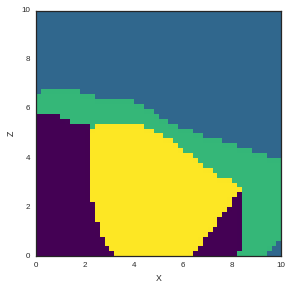

In [20]:
GeMpy.compute_block_model(geo_data, series_number= 'all', verbose = 0)
GeMpy.plot_section(geo_data, 13)


## Side note: Example of covariances involved in the cokriging system

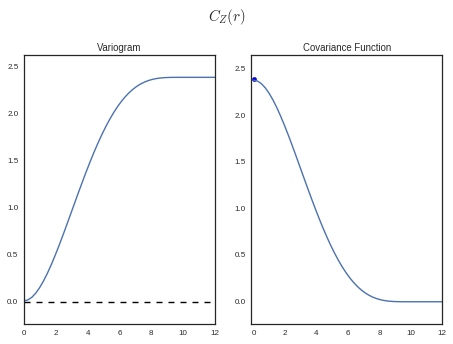

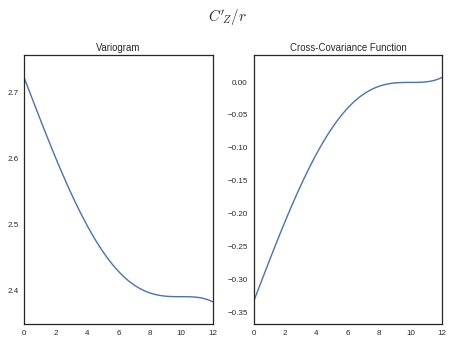

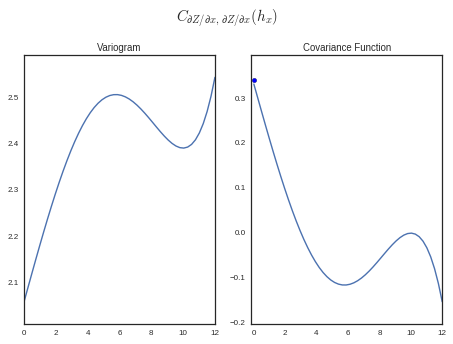

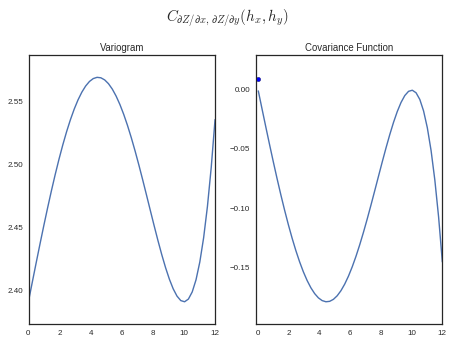

In [21]:
plot_potential_var(10,10**2 / 14 / 3  , 0.01)

plot_all(10,10**2 / 14 / 3  , 0.01) # 0**2 /14/3